<a id="table-of-contents"></a>  
# 📖 Table of Contents  
1. [🧭 Overview](#overview)  
2. [📏 Distance Metrics for Numeric Data](#distance-metrics-for-numeric-data)  
   - [📌 Euclidean Distance](#euclidean-distance)  
   - [📌 Manhattan Distance](#manhattan-distance)  
   - [📌 Minkowski Distance](#minkowski-distance)  
   - [📌 Mahalanobis Distance](#mahalanobis-distance)  
3. [🧮 Distance Metrics for Vectors and Angles](#distance-metrics-for-vectors-and-angles)  
   - [📌 Cosine Similarity / Distance](#cosine-similarity--distance)  
4. [🔤 Distance Metrics for Categorical or Binary Data](#distance-metrics-for-categorical-or-binary-data)  
   - [📌 Hamming Distance](#hamming-distance)  
   - [📌 Jaccard Similarity / Distance](#jaccard-similarity--distance)  
5. [📊 Similarity Measures for Continuous Data](#similarity-measures-for-continuous-data)  
   - [📌 Pearson Correlation](#pearson-correlation)  
   - [📌 Spearman Rank Correlation](#spearman-rank-correlation)  
___

<a id="overview"></a>  
# 🧭 Overview  

<details><summary><strong>📖 Click to Expand</strong></summary>  

<p>This notebook covers a wide range of <strong>distance and similarity metrics</strong> that are foundational to machine learning and statistical analysis.</p>

<ul>
  <li>📏 <strong>Distance Metrics for Numeric Data</strong>  
    Includes Euclidean, Manhattan, Minkowski, and Mahalanobis distances—core to algorithms like KNN, clustering, and anomaly detection.
  </li>
  <li>🧮 <strong>Vector-Based Measures</strong>  
    Covers Cosine similarity, useful in high-dimensional spaces like NLP and recommender systems.
  </li>
  <li>🔤 <strong>Distance Metrics for Categorical/Binary Data</strong>  
    Includes Hamming and Jaccard distances, often used in matching and similarity scoring for categorical features.
  </li>
  <li>📊 <strong>Similarity Measures for Continuous Data</strong>  
    Covers Pearson and Spearman correlations, essential for understanding relationships and dependencies between numeric variables.
  </li>
</ul>

<p>Each section contains:</p>
<ul>
  <li>Clear explanation + intuition</li>
  <li>Mathematical formula</li>
  <li>Clean, reproducible code implementation</li>
</ul>

</details>


[Back to the top](#table-of-contents)
___


<a id="distance-metrics-for-numeric-data"></a>  
# 📏 Distance Metrics for Numeric Data  

<details><summary><strong>📖 Click to Expand</strong></summary>  

This section includes distance metrics that operate on **numerical features**. These metrics are used when data points are represented as vectors in a continuous feature space.

They form the backbone of many machine learning algorithms, particularly those that rely on geometric closeness, such as:

- 📌 **K-Nearest Neighbors (KNN)**
- 📌 **K-Means Clustering**
- 📌 **Anomaly Detection**
- 📌 **Distance-based recommender systems**

Each metric here differs in how it defines "closeness"—some are sensitive to scale or outliers, while others account for data correlations.

</details>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import (
    minkowski,
    mahalanobis,
    cosine,
    hamming,
    jaccard,
    euclidean,
)

from scipy.stats import pearsonr, spearmanr
from numpy.linalg import norm


#### 📌 Euclidean Distance  
<a id="euclidean-distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
The straight-line (as-the-crow-flies) distance between two points in space. Think of it like using a ruler to measure distance on a map.

🧮 **Formula**

$$
d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

⚠️ **Sensitivity**  
- Sensitive to scale differences between features  
- Highly affected by outliers  
- Requires normalization when features vary in range

🧰 **Use Cases + Real-World Examples**  
- Used in **KNN** and **K-Means** to compute closeness  
- In **image processing**, for comparing pixel intensities or feature embeddings  
- Can model physical distances in **geospatial analysis** when units are aligned

📝 **Notes**  
- Assumes all features contribute equally  
- Simple, intuitive, but not always reliable without preprocessing  
- Can mislead in high-dimensional spaces or with unscaled features

</details>


`Import Libraries`

In [2]:
def compute_euclidean_distance(x, y, method="both", visualize=False):
    """
    Compute the Euclidean distance between two vectors using manual and/or library methods.

    Parameters:
    - x (array-like): First vector
    - y (array-like): Second vector
    - method (str): 'manual', 'library', or 'both' (default: 'both')
    - visualize (bool): Whether to show a 2D visualization if applicable (default: False)

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    lib_dist = None

    if method in ["library", "both"]:
        lib_dist = euclidean(x, y)
        print(f"⚙️  Euclidean Distance: {lib_dist:.4f}")

    if method in ["manual", "both"]:
        manual_dist = np.sqrt(np.sum((x - y) ** 2))
        print(f"📐 Euclidean Distance (Custom Code): {manual_dist:.4f}")

    if visualize and len(x) == 2 and len(y) == 2:
        if lib_dist is None:
            lib_dist = euclidean(x, y)  # fallback for plotting

        plt.figure(figsize=(5, 5))
        plt.scatter(*x, color='blue', s=100)
        plt.scatter(*y, color='green', s=100)
        plt.plot([x[0], y[0]], [x[1], y[1]], 'r--')

        # Annotate distance
        mid_x, mid_y = (x[0] + y[0]) / 2, (x[1] + y[1]) / 2
        plt.text(mid_x, mid_y, f"Distance = {lib_dist:.4f}", fontsize=12, color='red', ha='center', va='bottom')

        # Annotate points
        plt.text(*x, f'  x {tuple(x)}', fontsize=12, verticalalignment='bottom')
        plt.text(*y, f'  y {tuple(y)}', fontsize=12, verticalalignment='bottom')

        plt.title("Euclidean Distance Visualization (2D)")
        plt.axis('equal')
        plt.show()

⚙️  Euclidean Distance: 5.0000
📐 Euclidean Distance (Custom Code): 5.0000


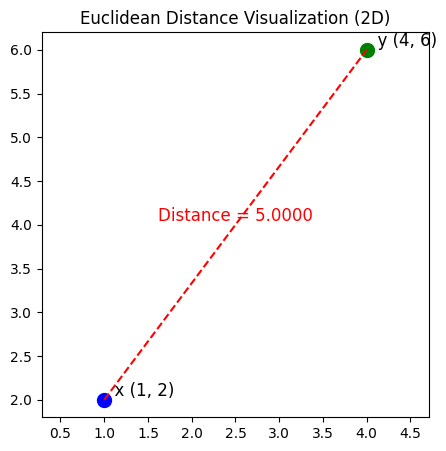

In [3]:
# Example usage
x = [1, 2]
y = [4, 6]
compute_euclidean_distance(x, y, method="both", visualize=True)


In [4]:
# 5D example (no visualization)
x_5d = [1, 3, 5, 7, 9]
y_5d = [2, 4, 6, 8, 10]
compute_euclidean_distance(x_5d, y_5d, method="both", visualize=False)


⚙️  Euclidean Distance: 2.2361
📐 Euclidean Distance (Custom Code): 2.2361


<hr style="border: none; height: 1px; background-color: #ddd;" />


#### 📌 Manhattan Distance  
<a id="manhattan-distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures distance by summing absolute differences across dimensions. Like navigating a city grid—no diagonal shortcuts, only vertical and horizontal movement.

🧮 **Formula**

$$
d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

⚠️ **Sensitivity**  
- Less sensitive to outliers than Euclidean  
- Still scale-dependent—normalization is recommended  
- Can be more robust in sparse or high-dimensional settings

🧰 **Use Cases + Real-World Examples**  
- Common in **recommender systems** where input vectors are high-dimensional and sparse  
- Used in **L1-regularized models** like Lasso, which induce sparsity  
- Helpful when minimizing absolute error is preferred (e.g., **median-based objectives**)

📝 **Notes**  
- Captures linear path cost better than Euclidean in some contexts  
- Useful when small differences across many features matter more than large differences in a few  
- Often performs better than Euclidean in high-dimensional, noisy data

</details>


In [5]:
import numpy as np
from scipy.spatial.distance import cityblock
import matplotlib.pyplot as plt

def compute_manhattan_distance(x, y, method="both", visualize=False):
    """
    Compute the Manhattan (L1) distance between two vectors using manual and/or library methods.

    Parameters:
    - x (array-like): First vector
    - y (array-like): Second vector
    - method (str): 'manual', 'library', or 'both' (default: 'both')
    - visualize (bool): Whether to show a 2D visualization if applicable (default: False)

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    lib_dist = None

    if method in ["library", "both"]:
        lib_dist = cityblock(x, y)
        print(f"⚙️  Manhattan Distance: {lib_dist:.4f}")

    if method in ["manual", "both"]:
        manual_dist = np.sum(np.abs(x - y))
        print(f"📐 Manhattan Distance (Custom Code): {manual_dist:.4f}")

    if visualize and len(x) == 2 and len(y) == 2:
        if lib_dist is None:
            lib_dist = cityblock(x, y)

        plt.figure(figsize=(5, 5))
        plt.scatter(*x, color='blue', s=100)
        plt.scatter(*y, color='green', s=100)

        # Draw horizontal and vertical segments
        plt.plot([x[0], y[0]], [x[1], x[1]], 'r--')  # horizontal
        plt.plot([y[0], y[0]], [x[1], y[1]], 'r--')  # vertical

        # Annotate distances on the segments
        plt.text((x[0] + y[0]) / 2, x[1], f"Δx = {abs(x[0] - y[0])}", 
                 fontsize=10, color='blue', ha='center', va='bottom')
        plt.text(y[0], (x[1] + y[1]) / 2, f"Δy = {abs(x[1] - y[1])}", 
                 fontsize=10, color='green', ha='left', va='center')

        # Annotate total distance
        mid_x, mid_y = (x[0] + y[0]) / 2, (x[1] + y[1]) / 2
        plt.text(mid_x, mid_y, f"Distance = {lib_dist:.4f}", fontsize=12, color='red', ha='center', va='bottom')

        # Label points with coordinates
        plt.text(*x, f'  x {tuple(x)}', fontsize=12, verticalalignment='bottom')
        plt.text(*y, f'  y {tuple(y)}', fontsize=12, verticalalignment='bottom')

        plt.title("Manhattan Distance Visualization (2D)")
        plt.axis('equal')
        plt.show()

⚙️  Manhattan Distance: 7.0000
📐 Manhattan Distance (Custom Code): 7.0000


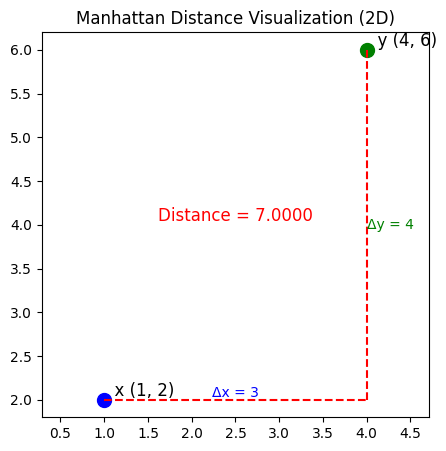

In [6]:
# Example usage
x = [1, 2]
y = [4, 6]
compute_manhattan_distance(x, y, method="both", visualize=True)

In [7]:
# 5D usage (no plot)
x_5d = [1, 3, 5, 7, 9]
y_5d = [2, 4, 6, 8, 10]
compute_manhattan_distance(x_5d, y_5d, method="both", visualize=False)


⚙️  Manhattan Distance: 5.0000
📐 Manhattan Distance (Custom Code): 5.0000


<hr style="border: none; height: 1px; background-color: #ddd;" />

#### 📌 Minkowski Distance  
<a id="minkowski-distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
A generalization of both Euclidean and Manhattan distances. By adjusting the parameter \( p \), it morphs into different distance metrics. Think of it as a flexible distance formula with a sensitivity dial.

🧮 **Formula**

$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$$

⚠️ **Sensitivity**  
- Sensitive to the choice of \( p \):  
  - \( p = 1 \): Manhattan Distance  
  - \( p = 2 \): Euclidean Distance  
- Higher \( p \) values emphasize larger deviations  
- Still scale-dependent like its special cases

🧰 **Use Cases + Real-World Examples**  
- Used in **KNN classifiers** to experiment with different notions of "closeness"  
- Helpful in **model tuning**, especially when testing sensitivity to distance metrics  
- Useful in **feature engineering pipelines** with customizable distance needs

📝 **Notes**  
- Acts as a bridge between L1 and L2 distances  
- Not commonly used directly, but understanding it gives you control over distance behavior  
- Can help explore robustness to outliers by adjusting \( p \)

</details>


In [8]:
def compute_minkowski_distance(x, y, p=3, method="both", visualize=False):
    """
    Compute the Minkowski distance between two vectors using manual and/or library methods.

    Parameters:
    - x (array-like): First vector
    - y (array-like): Second vector
    - p (int or float): Order of the norm (e.g., 1 for Manhattan, 2 for Euclidean)
    - method (str): 'manual', 'library', or 'both' (default: 'both')
    - visualize (bool): Show a 2D visualization (only works for p=1 or p=2) (default: False)

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    lib_dist = None

    if method in ["library", "both"]:
        lib_dist = minkowski(x, y, p)
        print(f"⚙️  Minkowski Distance (p = {p}): {lib_dist:.4f}")

    if method in ["manual", "both"]:
        manual_dist = np.sum(np.abs(x - y) ** p) ** (1 / p)
        print(f"📐 Minkowski Distance (Custom Code, p = {p}): {manual_dist:.4f}")

    if visualize:
        if len(x) != 2 or len(y) != 2:
            print("⚠️  Visualization skipped: only supported for 2D vectors.")
        elif p not in [1, 2]:
            print(f"⚠️  Visualization skipped: p = {p} is not supported for geometric interpretation (only p = 1 or 2).")
        else:
            plt.figure(figsize=(5, 5))
            plt.scatter(*x, color='blue', s=100)
            plt.scatter(*y, color='green', s=100)
            plt.plot([x[0], y[0]], [x[1], y[1]], 'r--')

            # Annotate distance
            mid_x, mid_y = (x[0] + y[0]) / 2, (x[1] + y[1]) / 2
            plt.text(mid_x, mid_y, f"Distance = {lib_dist:.4f}", fontsize=12, color='red', ha='center', va='bottom')

            # Label points
            plt.text(*x, f'  x {tuple(x)}', fontsize=12, verticalalignment='bottom')
            plt.text(*y, f'  y {tuple(y)}', fontsize=12, verticalalignment='bottom')

            plt.title(f"Minkowski Distance Visualization (2D, p = {p})")
            plt.axis('equal')
            plt.show()



In [9]:
# Example usage (p = 3, should not visualize)
x = [1, 2]
y = [4, 6]
compute_minkowski_distance(x, y, p=3, method="both", visualize=True)



⚙️  Minkowski Distance (p = 3): 4.4979
📐 Minkowski Distance (Custom Code, p = 3): 4.4979
⚠️  Visualization skipped: p = 3 is not supported for geometric interpretation (only p = 1 or 2).


⚙️  Minkowski Distance (p = 2): 5.0000
📐 Minkowski Distance (Custom Code, p = 2): 5.0000


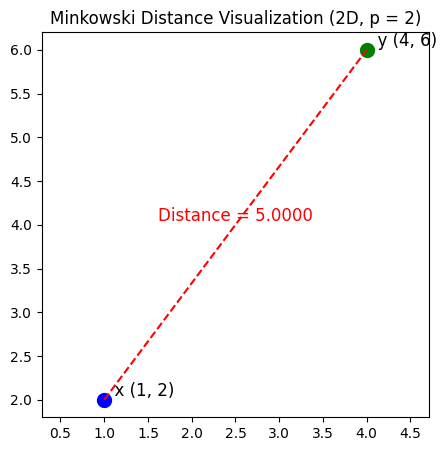

In [10]:
# Example usage (p = 2, will visualize)
compute_minkowski_distance(x, y, p=2, method="both", visualize=True)

<hr style="border: none; height: 1px; background-color: #ddd;" />

#### 📌 Mahalanobis Distance  
<a id="mahalanobis-distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures distance between a point and a distribution, not just another point. It accounts for the variance and correlation in the data, effectively "whitening" the space before measuring distance.

🧮 **Formula**

$$
d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}
$$

Where \( S \) is the covariance matrix of the data.

⚠️ **Sensitivity**  
- Not scale-sensitive—handles feature scaling internally via covariance  
- Sensitive to multicollinearity or singularity in the covariance matrix  
- Requires a well-estimated covariance matrix (large sample size helps)

🧰 **Use Cases + Real-World Examples**  
- Common in **multivariate outlier detection** (e.g., fraud detection in finance)  
- Used in **discriminant analysis** (e.g., LDA)  
- Helpful when features are correlated, unlike Euclidean/Manhattan

📝 **Notes**  
- Allows distance to stretch/shrink based on feature correlation structure  
- Highlights points that are far from the mean *and* unusual based on the data distribution  
- More reliable with large, clean datasets—can break with singular or noisy covariance

</details>


In [11]:
def compute_mahalanobis_distance(x, y, data=None, cov_matrix=None, method="both"):
    """
    Compute the Mahalanobis distance between two vectors using manual and/or library methods.

    Parameters:
    - x (array-like): First vector
    - y (array-like): Second vector
    - data (array-like, optional): Dataset to compute covariance matrix if cov_matrix is not provided
    - cov_matrix (ndarray, optional): Precomputed covariance matrix
    - method (str): 'manual', 'library', or 'both' (default: 'both')

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    if cov_matrix is None:
        if data is None:
            raise ValueError("Either a covariance matrix or sample data must be provided.")
        data = np.array(data)
        cov_matrix = np.cov(data.T)

    try:
        inv_cov = np.linalg.inv(cov_matrix)
    except np.linalg.LinAlgError:
        raise ValueError("Covariance matrix is singular or not invertible.")

    lib_dist = None

    if method in ["library", "both"]:
        lib_dist = mahalanobis(x, y, inv_cov)
        print(f"⚙️  Mahalanobis Distance: {lib_dist:.4f}")

    if method in ["manual", "both"]:
        diff = x - y
        manual_dist = np.sqrt(diff.T @ inv_cov @ diff)
        print(f"📐 Mahalanobis Distance (Custom Code): {manual_dist:.4f}")

In [12]:
# Example usage
data = [
    [1, 2],
    [4, 6],
    [3, 5],
    [5, 7]
]
x = [1, 2]
y = [4, 6]
compute_mahalanobis_distance(x, y, data=data, method="both")

⚙️  Mahalanobis Distance: 2.0000
📐 Mahalanobis Distance (Custom Code): 2.0000


In [13]:
# Example with 5D
data_5d = np.random.randn(100, 5)
x_5d = data_5d[0]
y_5d = data_5d[1]
compute_mahalanobis_distance(x_5d, y_5d, data=data_5d, method="both")

⚙️  Mahalanobis Distance: 2.6219
📐 Mahalanobis Distance (Custom Code): 2.6219


[Back to the top](#table-of-contents)
___


<a id="distance-metrics-for-vectors-and-angles"></a>  
# 🧮 Distance Metrics for Vectors and Angles  

<details><summary><strong>📖 Click to Expand</strong></summary>  

This section focuses on metrics that measure **angular relationships** between vectors, rather than their raw distance.

These are especially useful in **high-dimensional spaces** where magnitude is less meaningful and **direction** matters more.

Typical scenarios include:
- 🧠 **NLP**: comparing TF-IDF or embedding vectors  
- 🎧 **Recommender Systems**: user/item interaction vectors  
- 🧬 **Similarity Scoring** in sparse or normalized datasets

These metrics shine when you're more interested in **alignment** than absolute difference.

</details>


#### 📌 Cosine Similarity / Distance  
<a id="cosine-similarity--distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures the angle between two vectors, not their magnitude. It captures how aligned two directions are—perfect for understanding similarity in high-dimensional, sparse spaces.

🧮 **Formula**

$$
\text{Cosine Similarity} = \frac{\vec{x} \cdot \vec{y}}{||\vec{x}|| \cdot ||\vec{y}||}
$$

$$
\text{Cosine Distance} = 1 - \text{Cosine Similarity}
$$

⚠️ **Sensitivity**  
- Ignores magnitude, focuses only on orientation  
- Not affected by vector scaling (e.g., multiplying a vector by 10 doesn’t change similarity)  
- Still sensitive to dimensionality sparsity if most features are zeros

🧰 **Use Cases + Real-World Examples**  
- Dominant metric in **text analysis**, especially with **TF-IDF** vectors  
- Used in **recommender systems** to compute user-item similarity  
- Helps detect directionally similar patterns regardless of intensity (e.g., in topic modeling)

📝 **Notes**  
- Works well when **direction matters more than magnitude**  
- Can be misleading if vectors are zero or near-zero (need to handle edge cases)  
- In practice, often used with high-dimensional embeddings (e.g., NLP, document matching)

</details>


In [14]:
def compute_cosine_similarity_distance(x, y, method="both", visualize=False):
    x = np.array(x)
    y = np.array(y)
    origin = np.zeros(2)

    if method in ["library", "both"]:
        cos_dist = cosine(x, y)
        cos_sim = 1 - cos_dist
        print(f"⚙️  Cosine Similarity: {cos_sim:.4f}")
        print(f"⚙️  Cosine Distance  : {cos_dist:.4f}")

    if method in ["manual", "both"]:
        manual_sim = np.dot(x, y) / (norm(x) * norm(y))
        manual_dist = 1 - manual_sim
        print(f"📐 Cosine Similarity (Custom Code): {manual_sim:.4f}")
        print(f"📐 Cosine Distance (Custom Code)  : {manual_dist:.4f}")

    if visualize and len(x) == 2 and len(y) == 2:
        angle_rad = np.arccos(np.clip(np.dot(x, y) / (norm(x) * norm(y)), -1.0, 1.0))
        angle_deg = np.degrees(angle_rad)
        angle_label = f"θ ≈ {angle_deg:.1f}°"
        angle_pos = (x + y) / 2

        fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
        ax.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='blue', label=f"x {tuple(x)}")
        ax.quiver(*origin, *y, angles='xy', scale_units='xy', scale=1, color='green', label=f"y {tuple(y)}")
        ax.text(*angle_pos, angle_label, fontsize=12, color='red', ha='center')

        all_coords = np.array([origin, x, y])
        min_x, max_x = all_coords[:, 0].min(), all_coords[:, 0].max()
        min_y, max_y = all_coords[:, 1].min(), all_coords[:, 1].max()
        pad = 1
        ax.set_xlim(min_x - pad, max_x + pad)
        ax.set_ylim(min_y - pad, max_y + pad)

        ax.set_aspect('equal')
        ax.grid(True)
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.legend()
        ax.set_title("Cosine Similarity Visualization (2D)")
        plt.tight_layout()
        plt.show()


⚙️  Cosine Similarity: 0.9923
⚙️  Cosine Distance  : 0.0077
📐 Cosine Similarity (Custom Code): 0.9923
📐 Cosine Distance (Custom Code)  : 0.0077


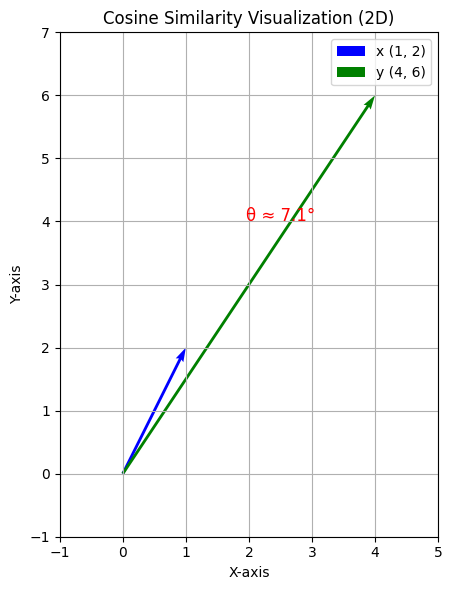

In [15]:
# # Example usage (2D)
x = [1, 2]
y = [4, 6]
compute_cosine_similarity_distance(x, y, method="both", visualize=True)



In [16]:
# Example usage (5D)
x_5d = [1, 3, 5, 7, 9]
y_5d = [2, 4, 6, 8, 10]
compute_cosine_similarity_distance(x_5d, y_5d, method="both", visualize=False)


⚙️  Cosine Similarity: 0.9972
⚙️  Cosine Distance  : 0.0028
📐 Cosine Similarity (Custom Code): 0.9972
📐 Cosine Distance (Custom Code)  : 0.0028


[Back to the top](#table-of-contents)
___


<a id="distance-metrics-for-categorical-or-binary-data"></a>  
# 🔤 Distance Metrics for Categorical or Binary Data  

<details><summary><strong>📖 Click to Expand</strong></summary>  

This section includes metrics tailored for **categorical**, **binary**, or **boolean** feature spaces—where traditional numeric distances don’t make sense.

These are particularly useful when:
- Your data is one-hot encoded  
- You're comparing sequences, strings, or sets  
- Features are **non-numeric** but still informative

Common applications:
- 🧬 **Genomic and text sequence comparison**  
- 📦 **Product recommendation based on binary attributes**  
- 🏷️ **Clustering with categorical features**  

These metrics help quantify **presence/absence** and **set overlap**, making them ideal for discrete comparisons.

</details>


#### 📌 Hamming Distance  
<a id="hamming-distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Counts how many positions two strings (or binary vectors) differ in. Imagine comparing two passwords or binary sequences and marking the mismatches.

🧮 **Formula**

$$
d(x, y) = \sum_{i=1}^{n} \mathbf{1}(x_i \ne y_i) \\
\text{where } \mathbf{1}(x_i \ne y_i) = 
\begin{cases}
1, & \text{if } x_i \ne y_i \\
0, & \text{otherwise}
\end{cases}
$$

⚠️ **Sensitivity**  
- Only works on equal-length vectors  
- Binary/categorical only—makes no sense for continuous values  
- Each mismatch is treated equally, no weighting

🧰 **Use Cases + Real-World Examples**  
- Used in **error detection/correction** (e.g., digital communication, QR codes)  
- Common in **genomic sequence analysis**  
- Helpful for comparing **one-hot encoded categorical features** in clustering or similarity scoring

📝 **Notes**  
- Simple and interpretable for binary comparisons  
- Doesn’t account for *how different* the values are—just whether they differ  
- Can be extended to non-binary categorical data using matching scores

</details>


In [17]:
def compute_hamming_distance(x, y, method="both"):
    """
    Compute the Hamming distance between two equal-length vectors using manual and/or library methods.

    Parameters:
    - x (array-like or string): First input
    - y (array-like or string): Second input
    - method (str): 'manual', 'library', or 'both' (default: 'both')

    Returns:
    - None (prints results directly)
    """
    if len(x) != len(y):
        raise ValueError("Inputs must be of equal length.")

    x = np.array(list(x)) if isinstance(x, str) else np.array(x)
    y = np.array(list(y)) if isinstance(y, str) else np.array(y)

    lib_dist = None

    if method in ["library", "both"]:
        lib_dist = hamming(x, y) * len(x)  # convert from proportion to raw count
        print(f"⚙️  Hamming Distance: {lib_dist:.4f}")

    if method in ["manual", "both"]:
        manual_dist = np.sum(x != y)
        print(f"📐 Hamming Distance (Custom Code): {manual_dist:.4f}")

In [18]:
# Example usage: binary lists
x = [1, 0, 1, 1, 0, 1]
y = [1, 1, 0, 1, 0, 0]
compute_hamming_distance(x, y, method="both")

⚙️  Hamming Distance: 3.0000
📐 Hamming Distance (Custom Code): 3.0000


In [19]:
# Example usage: strings
compute_hamming_distance("dancer", "danger", method="both")

⚙️  Hamming Distance: 1.0000
📐 Hamming Distance (Custom Code): 1.0000


<hr style="border: none; height: 1px; background-color: #ddd;" />

#### 📌 Jaccard Similarity / Distance  
<a id="jaccard-similarity--distance"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures the overlap between two sets relative to their union. It tells you *how similar two binary vectors or sets are*, ignoring what they don't share.

🧮 **Formula**

$$
\text{Jaccard Similarity} = \frac{|A \cap B|}{|A \cup B|} \\
\text{Jaccard Distance} = 1 - \text{Jaccard Similarity}
$$

⚠️ **Sensitivity**  
- Only works on binary/categorical data or sets  
- Ignores true negatives (things both sets don't have)  
- Sensitive to sparsity—more zeros → lower similarity

🧰 **Use Cases + Real-World Examples**  
- Common in **recommender systems** to compare item sets (e.g., users with similar purchase histories)  
- Used in **clustering binary data** (e.g., one-hot encoded attributes)  
- Applied in **text mining** to compare sets of words (bag-of-words or shingled phrases)

📝 **Notes**  
- Especially useful when **presence** is more important than absence  
- Performs well when comparing sparse or asymmetric binary vectors  
- Jaccard Distance is a proper metric (satisfies triangle inequality)

</details>


In [20]:
def compute_jaccard_distance(x, y, method="both"):
    """
    Compute Jaccard Similarity and Jaccard Distance between two inputs.

    Parameters:
    - x (array-like, set, or string): First input
    - y (array-like, set, or string): Second input
    - method (str): 'manual', 'library', or 'both' (default: 'both')

    Returns:
    - None (prints results directly)
    """
    # Convert string to set of characters
    if isinstance(x, str) and isinstance(y, str):
        x = set(x)
        y = set(y)

    # Convert binary vectors to numpy arrays
    elif isinstance(x, (list, tuple, np.ndarray)) and isinstance(y, (list, tuple, np.ndarray)):
        x = np.array(x)
        y = np.array(y)

    lib_dist = None

    if method in ["library", "both"] and isinstance(x, np.ndarray):
        lib_dist = jaccard(x, y)
        lib_sim = 1 - lib_dist
        print(f"⚙️  Jaccard Similarity: {lib_sim:.4f}")
        print(f"⚙️  Jaccard Distance  : {lib_dist:.4f}")

    if method in ["manual", "both"]:
        if isinstance(x, np.ndarray):
            intersection = np.sum(np.logical_and(x, y))
            union = np.sum(np.logical_or(x, y))
        else:  # assumes sets
            intersection = len(x & y)
            union = len(x | y)

        manual_sim = intersection / union if union != 0 else 0
        manual_dist = 1 - manual_sim

        print(f"📐 Jaccard Similarity (Custom Code): {manual_sim:.4f}")
        print(f"📐 Jaccard Distance (Custom Code)  : {manual_dist:.4f}")

In [21]:
# Example: binary vectors
x_bin = [1, 0, 1, 1, 0]
y_bin = [0, 1, 1, 1, 0]
compute_jaccard_distance(x_bin, y_bin, method="both")


⚙️  Jaccard Similarity: 0.5000
⚙️  Jaccard Distance  : 0.5000
📐 Jaccard Similarity (Custom Code): 0.5000
📐 Jaccard Distance (Custom Code)  : 0.5000


In [22]:
# Example: English word character sets
compute_jaccard_distance("night", "thing", method="both")

📐 Jaccard Similarity (Custom Code): 1.0000
📐 Jaccard Distance (Custom Code)  : 0.0000


[Back to the top](#table-of-contents)
___


<a id="similarity-measures-for-continuous-data"></a>  
# 📊 Similarity Measures for Continuous Data  

<details><summary><strong>📖 Click to Expand</strong></summary>  

This section covers **correlation-based similarity measures** for continuous variables. Instead of measuring distance, these metrics quantify the **strength and direction of relationships** between variables.

Use cases typically involve:
- 📈 **Exploratory Data Analysis (EDA)**  
- 🧪 **Feature selection** in modeling pipelines  
- 💰 **Financial modeling** (e.g., correlation between asset returns)

These measures are:
- Scale-invariant  
- Useful for spotting patterns in **paired continuous variables**  
- Sensitive to relationship type—linear vs. monotonic

These metrics are key to understanding **how variables move together**, whether for modeling or diagnostics.

</details>


#### 📌 Pearson Correlation  
<a id="pearson-correlation"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures the strength and direction of a **linear relationship** between two continuous variables. A value of +1 means perfect positive linear correlation, -1 means perfect negative, and 0 means no linear relationship.

🧮 **Formula**

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
         {\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

⚠️ **Sensitivity**  
- Extremely sensitive to **outliers**  
- Assumes **linearity**  
- Affected by non-normal distributions or non-constant variance

🧰 **Use Cases + Real-World Examples**  
- Used in **feature selection** (e.g., removing highly correlated variables)  
- Helps in **exploratory data analysis** to understand relationships  
- Common in **finance** (e.g., correlation between stock returns)

📝 **Notes**  
- Does **not imply causation**—only association  
- Works best when both variables are continuous, normally distributed, and linearly related  
- For non-linear relationships, consider Spearman instead

</details>


In [23]:
def compute_pearson_correlation(x, y, method="both"):
    """
    Compute Pearson Correlation between two vectors.

    Parameters:
    - x (array-like): First variable
    - y (array-like): Second variable
    - method (str): 'manual', 'library', or 'both' (default: 'both')

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    if len(x) != len(y):
        raise ValueError("x and y must be of equal length.")

    if method in ["library", "both"]:
        lib_corr, _ = pearsonr(x, y)
        print(f"⚙️  Pearson Correlation: {lib_corr:.4f}")

    if method in ["manual", "both"]:
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sqrt(np.sum((x - x_mean)**2)) * np.sqrt(np.sum((y - y_mean)**2))
        manual_corr = numerator / denominator if denominator != 0 else 0
        print(f"📐 Pearson Correlation (Custom Code): {manual_corr:.4f}")

In [24]:
# Example usage
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 60]
compute_pearson_correlation(x, y, method="both")

⚙️  Pearson Correlation: 0.9959
📐 Pearson Correlation (Custom Code): 0.9959


In [25]:
# Strong but imperfect negative correlation
x_neg = [10, 20, 30, 40, 50]
y_neg = [92, 69, 48, 33, 13]  # slightly perturbed from a perfect linear drop
compute_pearson_correlation(x_neg, y_neg, method="both")


⚙️  Pearson Correlation: -0.9976
📐 Pearson Correlation (Custom Code): -0.9976


In [26]:
# x and y are unrelated → correlation close to 0
x_rand = [1, 2, 3, 4, 5]
y_rand = [42, 5, 67, 18, 33]
compute_pearson_correlation(x_rand, y_rand, method="both")


⚙️  Pearson Correlation: -0.0334
📐 Pearson Correlation (Custom Code): -0.0334


<hr style="border: none; height: 1px; background-color: #ddd;" />

#### 📌 Spearman Rank Correlation  
<a id="spearman-rank-correlation"></a>  

<details><summary><strong>📖 Click to Expand</strong></summary>  

🧠 **Intuition**  
Measures the **monotonic relationship** between two variables using their ranks instead of raw values. It tells you whether the relationship is consistently increasing or decreasing, even if not linear.

🧮 **Formula**

If there are no tied ranks:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} \\
\text{where } d_i = \text{rank}(x_i) - \text{rank}(y_i)
$$

⚠️ **Sensitivity**  
- Robust to **outliers**  
- Captures **monotonic** (not just linear) trends  
- Still assumes **ordinal** or continuous variables

🧰 **Use Cases + Real-World Examples**  
- Great for **ordinal data** (e.g., survey rankings, Likert scales)  
- Used when variables don’t meet normality assumptions  
- Common in **bioinformatics** or **psychometrics** for measuring association strength

📝 **Notes**  
- Doesn’t assume linearity or equal spacing between values  
- Less powerful than Pearson when linearity holds  
- Ideal fallback when data violates Pearson’s assumptions

</details>


In [27]:
def compute_spearman_correlation(x, y, method="both"):
    """
    Compute Spearman Rank Correlation between two vectors.

    Parameters:
    - x (array-like): First variable
    - y (array-like): Second variable
    - method (str): 'manual', 'library', or 'both' (default: 'both')

    Returns:
    - None (prints results directly)
    """
    x = np.array(x)
    y = np.array(y)

    if len(x) != len(y):
        raise ValueError("x and y must be of equal length.")

    if method in ["library", "both"]:
        lib_corr, _ = spearmanr(x, y)
        print(f"⚙️  Spearman Correlation: {lib_corr:.4f}")

    if method in ["manual", "both"]:
        rx = pd.Series(x).rank(method='average').values
        ry = pd.Series(y).rank(method='average').values

        rx_mean = np.mean(rx)
        ry_mean = np.mean(ry)
        numerator = np.sum((rx - rx_mean) * (ry - ry_mean))
        denominator = np.sqrt(np.sum((rx - rx_mean)**2)) * np.sqrt(np.sum((ry - ry_mean)**2))
        manual_corr = numerator / denominator if denominator != 0 else 0
        print(f"📐 Spearman Correlation (Custom Code): {manual_corr:.4f}")

In [28]:
# Example 1: Monotonic but non-linear (Spearman high, Pearson not)
x = [1, 2, 3, 4, 5]
y = [2, 4, 8, 16, 32]  # exponential
compute_spearman_correlation(x, y, method="both")

⚙️  Spearman Correlation: 1.0000
📐 Spearman Correlation (Custom Code): 1.0000


In [29]:
# Example 2: Tied ranks
x_tied = [1, 2, 2, 3, 4]
y_tied = [10, 20, 20, 30, 40]
compute_spearman_correlation(x_tied, y_tied, method="both")

⚙️  Spearman Correlation: 1.0000
📐 Spearman Correlation (Custom Code): 1.0000


[Back to the top](#table-of-contents)
___
